# Segmentação Semântica para Contextualizar Fases do Clima Espacial
* Objetivo: Dividir a série temporal em diferentes segmentos que representam
fases do clima espacial
* Entrada: Dados do campo magnético (BX, BY, BZ), velocidade do plasma, e índice Kp
* Saída: Segmentos semânticos - Período Calmo, Pré-Tempestade, Tempestade


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregamento do dataset com dados de clima espacial obtido de
# https://omniweb.gsfc.nasa.gov/

file_path = '/content/Dados Kp.csv'

In [3]:
dados_df = pd.read_csv(file_path)

# Visualizando os dados
print(dados_df.head())


   Seq  IMFB   BX   BY   BZ  PlasmaSpeed   Kp  Dst  Hp60  Sunspot  F10.7  \
0    1   4.8  0.4  4.3 -0.5        399.0  0.7    4     6      124  154.3   
1    2   5.0  2.2  4.0 -1.1        395.0  0.7    3     3      124  154.3   
2    3   5.5  1.1  3.8 -2.6        386.0  0.7    1     4      124  154.3   
3    4   5.5 -0.5  4.2 -3.3        376.0  1.3    1     3      124  154.3   
4    5   6.2 -1.7  4.1 -4.0        372.0  1.3   -1     6      124  154.3   

   Classificacao  
0  Período Calmo  
1  Período Calmo  
2  Período Calmo  
3  Período Calmo  
4  Período Calmo  


In [4]:
print (dados_df.value_counts)

<bound method DataFrame.value_counts of        Seq  IMFB   BX   BY   BZ  PlasmaSpeed   Kp  Dst  Hp60  Sunspot  F10.7  \
0        1   4.8  0.4  4.3 -0.5        399.0  0.7    4     6      124  154.3   
1        2   5.0  2.2  4.0 -1.1        395.0  0.7    3     3      124  154.3   
2        3   5.5  1.1  3.8 -2.6        386.0  0.7    1     4      124  154.3   
3        4   5.5 -0.5  4.2 -3.3        376.0  1.3    1     3      124  154.3   
4        5   6.2 -1.7  4.1 -4.0        372.0  1.3   -1     6      124  154.3   
...    ...   ...  ...  ...  ...          ...  ...  ...   ...      ...    ...   
3643  3644   4.6 -1.8  4.1 -0.6        291.0  0.3   12     2       64  106.2   
3644  3645   4.9 -2.5  3.6 -2.1        285.0  0.3   12     2       64  106.2   
3645  3646   5.1 -2.1  3.4 -2.9        287.0  0.7   11     4       64  106.2   
3646  3647   4.9 -1.3  3.9 -2.2        291.0  0.7   12     3       64  106.2   
3647  3648   4.8 -2.5  3.9  0.0        289.0  0.7    9     4       64  106.2   


In [5]:
# Limiares para segmentação
Kp_calmo_limite = 2       # índice Kp menor ou igual a 2 é para "Período Calmo"
Kp_pre_tempestade = 4     # índice Kp entre 2 e 4 é para "Pré-Tempestade"
Kp_tempestade_limite = 4  # índice Kp maior que 4 é  para "Tempestade"

In [6]:
# Categorização dos períodos

def categorizar_periodo(row):
    if row['Kp'] <= Kp_calmo_limite:
        return 'Período Calmo'
    elif Kp_calmo_limite < row['Kp'] <= Kp_pre_tempestade:
        return 'Pré-Tempestade'
    else:
        return 'Tempestade'


In [7]:
# Aplicando a função para criar a coluna Segmento coluna no dataframe
dados_df['Segmento'] = dados_df.apply(categorizar_periodo, axis=1)

In [8]:
# Exibir os dados com a coluna de segmentos
print(dados_df[['Kp', 'Classificacao', 'Segmento']].head())

    Kp  Classificacao       Segmento
0  0.7  Período Calmo  Período Calmo
1  0.7  Período Calmo  Período Calmo
2  0.7  Período Calmo  Período Calmo
3  1.3  Período Calmo  Período Calmo
4  1.3  Período Calmo  Período Calmo


In [9]:
# Exibir distribuição dos segmentos
segmento_counts = dados_df['Segmento'].value_counts()
print(segmento_counts)

Segmento
Período Calmo     2838
Pré-Tempestade     723
Tempestade          87
Name: count, dtype: int64


In [10]:
# Exibir distribuição da classificação original que já estava presente no dataset original
classificacao_counts = dados_df['Classificacao'].value_counts()
print(classificacao_counts)

Classificacao
Período Calmo    3561
G1                 63
G2                 21
G3                  3
Name: count, dtype: int64


In [11]:
# Plotar a distribuição dos segmentos ao longo do tempo
plt.figure(figsize=(10, 6))
colors = {'Período Calmo': 'green', 'Pré-Tempestade': 'orange', 'Tempestade': 'red'}

<Figure size 1000x600 with 0 Axes>

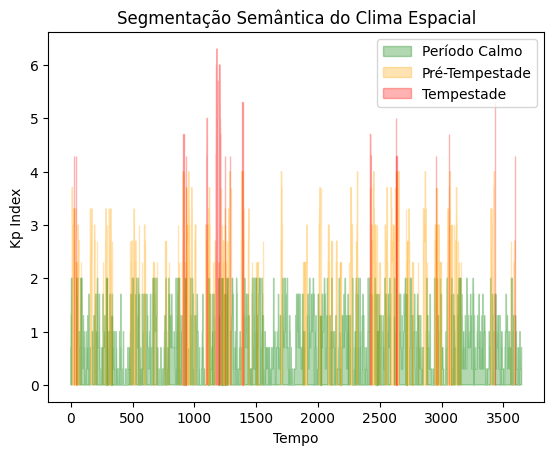

In [12]:
# Exibição dos segmentos
for segmento, cor in colors.items():
    plt.fill_between(dados_df.index, dados_df['Kp'], where=(dados_df['Segmento'] == segmento), color=cor, alpha=0.3, label=segmento)

plt.xlabel('Tempo')
plt.ylabel('Kp Index')
plt.title('Segmentação Semântica do Clima Espacial')
plt.legend()
plt.show()

In [13]:
# Gravando os dados segmentados
output_file_path = '/content/Dados_Segmentados.csv'
dados_df.to_csv(output_file_path, index=False)

# Detecção de Anomalias nas Fases Segmentadas
* Objetivo: Identificar anomalias nas séries temporais segmentadas

In [14]:
from sklearn.ensemble import IsolationForest

In [15]:
# Selecionar as características mais relevantes para a detecção de anomalias conforme literatura
features = ['BX', 'BY', 'BZ', 'PlasmaSpeed', 'Kp']
X = dados_df[features]

In [16]:
# Aplicar Isolation Forest para detectar anomalias
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
dados_df['Anomalia'] = model.fit_predict(X)

In [17]:
# Marcar as anomalias (-1 indica anomalia, 1 indica normal)
dados_df['Anomalia'] = dados_df['Anomalia'].apply(lambda x: 'Anômalo' if x == -1 else 'Normal')

In [18]:
# Exibir os dados com as anomalias identificadas
print(dados_df[['Kp', 'Segmento', 'Anomalia']].head())

    Kp       Segmento Anomalia
0  0.7  Período Calmo   Normal
1  0.7  Período Calmo   Normal
2  0.7  Período Calmo   Normal
3  1.3  Período Calmo   Normal
4  1.3  Período Calmo   Normal


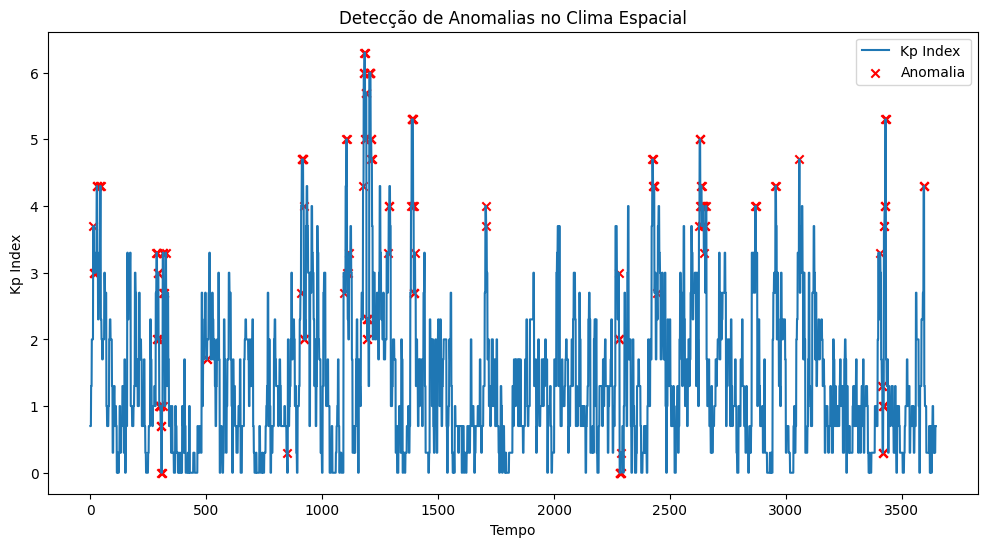

In [19]:
# Plotar as anomalias ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(dados_df.index, dados_df['Kp'], label='Kp Index')
plt.scatter(dados_df.index[dados_df['Anomalia'] == 'Anômalo'], dados_df['Kp'][dados_df['Anomalia'] == 'Anômalo'], color='red', label='Anomalia', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Kp Index')
plt.title('Detecção de Anomalias no Clima Espacial')
plt.legend()
plt.show()

In [20]:
# Gravar os dados com anomalias identificadas
output_anomaly_file_path = '/content/Dados_Anomalias.csv'
dados_df.to_csv(output_anomaly_file_path, index=False)

# Local Peak Detection: Detecção de picos por comparação local que Antecedem Tempestades
* Objetivo: Identificar de picos nos períodos de Pré-Tempestade e Tempestade

## find_peaks

In [21]:
from scipy.signal import find_peaks

In [22]:
# Filtrar dados dos períodos de Pré-Tempestade e Tempestade
dados_pre_tempestade_tempestade = dados_df[dados_df['Segmento'].isin(['Pré-Tempestade', 'Tempestade'])]

In [23]:
# Utilizar a função find_peaks para identificar picos nos dados do índice Kp, que podem estar associados aos períodos determinados
kp_values = dados_pre_tempestade_tempestade['Kp'].values
indices_picos, _ = find_peaks(kp_values, height=Kp_pre_tempestade)

In [24]:
# Coluna 'Picos' para indicar os picos identificados.
dados_pre_tempestade_tempestade['Picos'] = 'Normal'
dados_pre_tempestade_tempestade.iloc[indices_picos, dados_pre_tempestade_tempestade.columns.get_loc('Picos')] = 'Pico Identificado'


<ipython-input-24-64de0b8e834b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pre_tempestade_tempestade['Picos'] = 'Normal'


In [25]:
# Exibir os dados com os motifs identificados
print(dados_pre_tempestade_tempestade[['Kp', 'Segmento', 'Picos']].head())

     Kp        Segmento   Picos
12  3.7  Pré-Tempestade  Normal
13  3.7  Pré-Tempestade  Normal
14  3.7  Pré-Tempestade  Normal
15  3.0  Pré-Tempestade  Normal
16  3.0  Pré-Tempestade  Normal


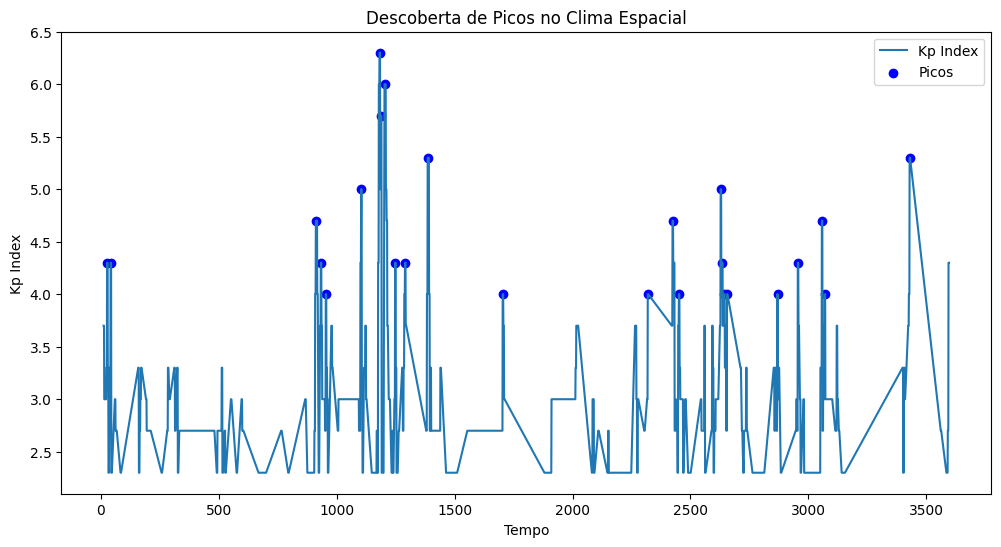

In [26]:
# Plotar os picos ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(dados_pre_tempestade_tempestade.index, dados_pre_tempestade_tempestade['Kp'], label='Kp Index')
plt.scatter(dados_pre_tempestade_tempestade.index[dados_pre_tempestade_tempestade['Picos'] == 'Pico Identificado'], dados_pre_tempestade_tempestade['Kp'][dados_pre_tempestade_tempestade['Picos'] == 'Pico Identificado'], color='blue', label='Picos', marker='o')
plt.xlabel('Tempo')
plt.ylabel('Kp Index')
plt.title('Descoberta de Picos no Clima Espacial')
plt.legend()
plt.show()

In [27]:
# Dados com picos identificados
output_picos_file_path = '/content/Dados_Picos.csv'
dados_pre_tempestade_tempestade.to_csv(output_picos_file_path, index=False)

### matrix_profile

In [28]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 7.2 MB/s eta 0:00:00


In [29]:
from stumpy import stump

In [30]:
# Aplicar Matrix Profile para descoberta de motifs adicionais
# Utilizando a biblioteca stumpy para calcular o matrix profile do índice Kp
window_size = 30  # Tamanho da janela para a análise do Matrix Profile
matrix_profile = stump(kp_values, m=window_size)

In [31]:
# Identificar os motifs mais semelhantes usando o matrix profile
motif_idx = np.argsort(matrix_profile[:, 0])[:5]  # Selecionar 5 motifs mais semelhantes

In [32]:
# Marcar os motifs identificados pelo Matrix Profile
dados_pre_tempestade_tempestade['Motif_MP'] = 'Normal'
dados_pre_tempestade_tempestade.iloc[motif_idx, dados_pre_tempestade_tempestade.columns.get_loc('Motif_MP')] = 'Motif MP Identificado'


<ipython-input-32-dedb4b6f369d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pre_tempestade_tempestade['Motif_MP'] = 'Normal'


In [33]:
# Exibir os dados com os motifs identificados pelo Matrix Profile
print(dados_pre_tempestade_tempestade[['Kp', 'Segmento', 'Picos', 'Motif_MP']].head())

     Kp        Segmento   Picos Motif_MP
12  3.7  Pré-Tempestade  Normal   Normal
13  3.7  Pré-Tempestade  Normal   Normal
14  3.7  Pré-Tempestade  Normal   Normal
15  3.0  Pré-Tempestade  Normal   Normal
16  3.0  Pré-Tempestade  Normal   Normal


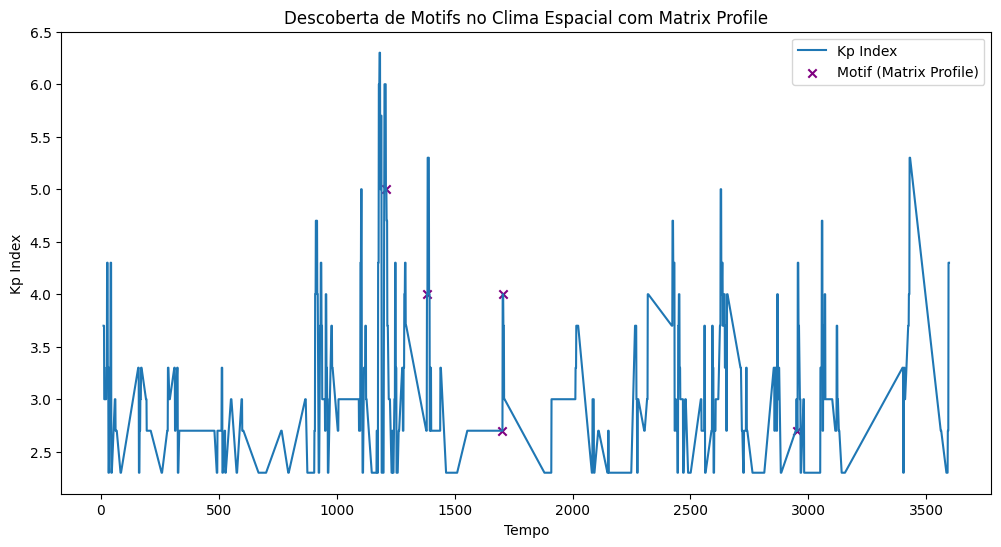

In [34]:
# Plotar os motifs identificados pelo Matrix Profile ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(dados_pre_tempestade_tempestade.index, dados_pre_tempestade_tempestade['Kp'], label='Kp Index')
plt.scatter(dados_pre_tempestade_tempestade.index[dados_pre_tempestade_tempestade['Motif_MP'] == 'Motif MP Identificado'], dados_pre_tempestade_tempestade['Kp'][dados_pre_tempestade_tempestade['Motif_MP'] == 'Motif MP Identificado'], color='purple', label='Motif (Matrix Profile)', marker='x')
plt.xlabel('Tempo')
plt.ylabel('Kp Index')
plt.title('Descoberta de Motifs no Clima Espacial com Matrix Profile')
plt.legend()
plt.show()

In [35]:
# Gravar Dados com motifs identificados
output_motif_mp_file_path = '/content/Dados_Motifs_MP.csv'
dados_pre_tempestade_tempestade.to_csv(output_motif_mp_file_path, index=False)


In [36]:
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.0 MB/s eta 0:00:00


In [37]:
from dtaidistance import dtw


In [38]:
# Selecionar os períodos de Pré-Tempestade e Tempestade para a busca de similaridade
dados_pre_tempestade_tempestade = dados_df[dados_df['Segmento'].isin(['Pré-Tempestade', 'Tempestade'])].copy()
kp_values = dados_pre_tempestade_tempestade['Kp'].values

In [39]:
# Subsequências de interesse (janela) para análise de similaridade
window_size = 30  # Definindo o tamanho da janela para subsequências

In [40]:
# Dividir a série temporal em subsequências
def criar_subsequencias(series, window_size):
    subsequencias = []
    for i in range(len(series) - window_size + 1):
        subsequencias.append(series[i:i + window_size])
    return subsequencias

In [41]:
subsequencias = criar_subsequencias(kp_values, window_size)

In [42]:
# Calcular a similaridade entre as subsequências usando DTW (Dynamic Time Warping)
similaridades = []
for i in range(len(subsequencias)):
    for j in range(i + 1, len(subsequencias)):
        distancia = dtw.distance(subsequencias[i], subsequencias[j])
        similaridades.append((i, j, distancia))

In [43]:
# Ordenar as subsequências mais semelhantes com base na distância DTW
similaridades_ordenadas = sorted(similaridades, key=lambda x: x[2])

In [44]:
# Selecionar as top 5 subsequências mais semelhantes
top_similaridades = similaridades_ordenadas[:5]

In [45]:
# Exibir os resultados
dados_pre_tempestade_tempestade['Similaridade'] = 'Normal'
for (i, j, distancia) in top_similaridades:
    indices_i = range(i, i + window_size)
    indices_j = range(j, j + window_size)
    dados_pre_tempestade_tempestade.iloc[indices_i, dados_pre_tempestade_tempestade.columns.get_loc('Similaridade')] = 'Similaridade Identificada'
    dados_pre_tempestade_tempestade.iloc[indices_j, dados_pre_tempestade_tempestade.columns.get_loc('Similaridade')] = 'Similaridade Identificada'


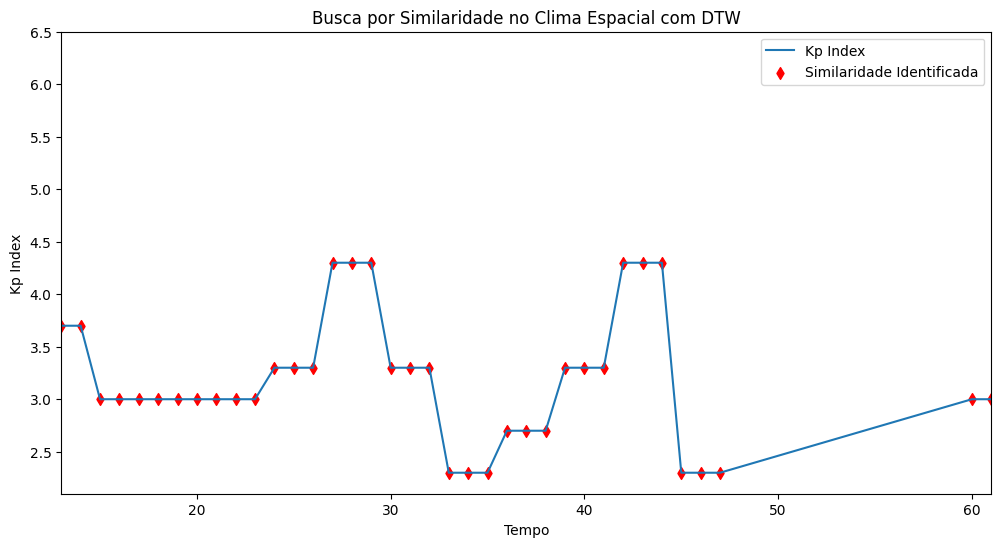

In [46]:
# Encontrar os índices que contêm as similaridades
indices_similaridade = dados_pre_tempestade_tempestade.index[dados_pre_tempestade_tempestade['Similaridade'] == 'Similaridade Identificada']

# Determinar o intervalo para limitar o gráfico
min_index = indices_similaridade.min()
max_index = indices_similaridade.max()

# Plotar as subsequências semelhantes ao longo do tempo com o intervalo limitado
plt.figure(figsize=(12, 6))
plt.plot(dados_pre_tempestade_tempestade.index, dados_pre_tempestade_tempestade['Kp'], label='Kp Index')
plt.scatter(indices_similaridade,
            dados_pre_tempestade_tempestade['Kp'][dados_pre_tempestade_tempestade['Similaridade'] == 'Similaridade Identificada'],
            color='red', label='Similaridade Identificada', marker='d')
plt.xlabel('Tempo')
plt.ylabel('Kp Index')
plt.title('Busca por Similaridade no Clima Espacial com DTW')
plt.legend()

# Limitar o eixo X ao intervalo que contém os diamantes
plt.xlim(min_index, max_index)

plt.show()


In [47]:
# Dados com similaridades identificadas
output_similarity_file_path = '/content/Dados_Similaridades.csv'
dados_pre_tempestade_tempestade.to_csv(output_similarity_file_path, index=False)


# Integração do Pipeline de análises anteriores



# 1.Conexão entre Segmentação Semântica, Anomalias e Motifs
* Objetivo: Analisar a relação entre as fases do clima espacial (segmentação semântica), as anomalias detectadas e os motifs identificados

In [48]:
import seaborn as sns

In [49]:
# Carregar os datasets gerados anteriormente
file_segmented = '/content/Dados_Segmentados.csv'
file_anomalies = '/content/Dados_Anomalias.csv'
file_motifs = '/content/Dados_Motifs_MP.csv'

dados_segmentados = pd.read_csv(file_segmented)
dados_anomalias = pd.read_csv(file_anomalies)
dados_motifs = pd.read_csv(file_motifs)

In [50]:
# Mesclar os datasets para integrar as informações de segmentos, anomalias e motifs
# Mesclagem com base no índice temporal
dados_integrados = dados_segmentados.copy()
dados_integrados['Anomalia'] = dados_anomalias['Anomalia']
dados_integrados['Motif_MP'] = dados_motifs['Motif_MP']

In [51]:
# Exibir os dados integrados
print(dados_integrados.head())

   Seq  IMFB   BX   BY   BZ  PlasmaSpeed   Kp  Dst  Hp60  Sunspot  F10.7  \
0    1   4.8  0.4  4.3 -0.5        399.0  0.7    4     6      124  154.3   
1    2   5.0  2.2  4.0 -1.1        395.0  0.7    3     3      124  154.3   
2    3   5.5  1.1  3.8 -2.6        386.0  0.7    1     4      124  154.3   
3    4   5.5 -0.5  4.2 -3.3        376.0  1.3    1     3      124  154.3   
4    5   6.2 -1.7  4.1 -4.0        372.0  1.3   -1     6      124  154.3   

   Classificacao       Segmento Anomalia Motif_MP  
0  Período Calmo  Período Calmo   Normal   Normal  
1  Período Calmo  Período Calmo   Normal   Normal  
2  Período Calmo  Período Calmo   Normal   Normal  
3  Período Calmo  Período Calmo   Normal   Normal  
4  Período Calmo  Período Calmo   Normal   Normal  


In [52]:
# Obter a frequência de anomalias em cada segmento
anomalia_frequencia = dados_integrados.groupby('Segmento')['Anomalia'].value_counts(normalize=True).unstack()
print(anomalia_frequencia)

Anomalia         Anômalo    Normal
Segmento                          
Período Calmo   0.015856  0.984144
Pré-Tempestade  0.095436  0.904564
Tempestade      0.793103  0.206897


<Figure size 1000x600 with 0 Axes>

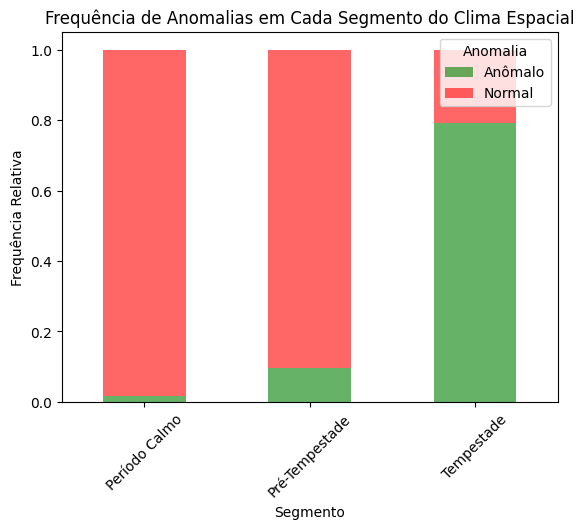

In [53]:
# Plotar a frequência de anomalias em cada segmento
plt.figure(figsize=(10, 6))
anomalia_frequencia.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.6)
plt.xlabel('Segmento')
plt.ylabel('Frequência Relativa')
plt.title('Frequência de Anomalias em Cada Segmento do Clima Espacial')
plt.xticks(rotation=45)
plt.legend(title='Anomalia')
plt.show()

In [54]:
# Analisar a frequência de motifs identificados em cada segmento
motif_frequencia = dados_integrados.groupby('Segmento')['Motif_MP'].value_counts(normalize=True).unstack()
print(motif_frequencia)

Motif_MP        Motif MP Identificado    Normal
Segmento                                       
Período Calmo                0.007576  0.992424
Pré-Tempestade                    NaN  1.000000
Tempestade                        NaN  1.000000


<Figure size 1000x600 with 0 Axes>

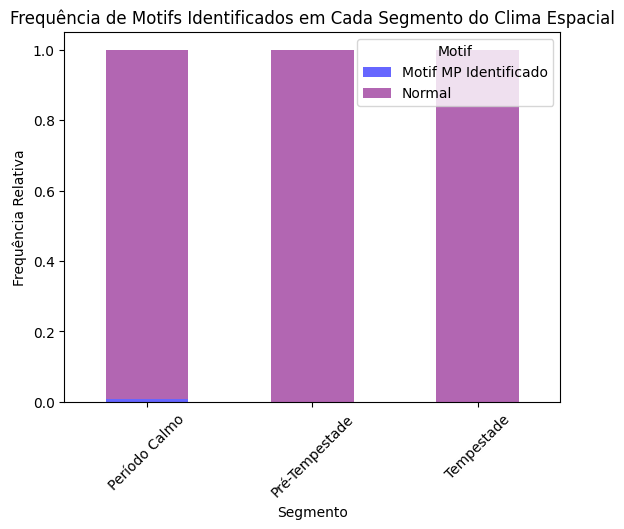

In [55]:
# Plotar a frequência dos motifs em cada segmento
plt.figure(figsize=(10, 6))
motif_frequencia.plot(kind='bar', stacked=True, color=['blue', 'purple'], alpha=0.6)
plt.xlabel('Segmento')
plt.ylabel('Frequência Relativa')
plt.title('Frequência de Motifs Identificados em Cada Segmento do Clima Espacial')
plt.xticks(rotation=45)
plt.legend(title='Motif')
plt.show()

In [56]:
# Analisar correlação entre anomalias e motifs
motifs_anomalias_corr = pd.crosstab(dados_integrados['Anomalia'], dados_integrados['Motif_MP'], normalize='index')
print(motifs_anomalias_corr)


Motif_MP  Motif MP Identificado    Normal
Anomalia                                 
Anômalo                0.022222  0.977778
Normal                 0.005229  0.994771


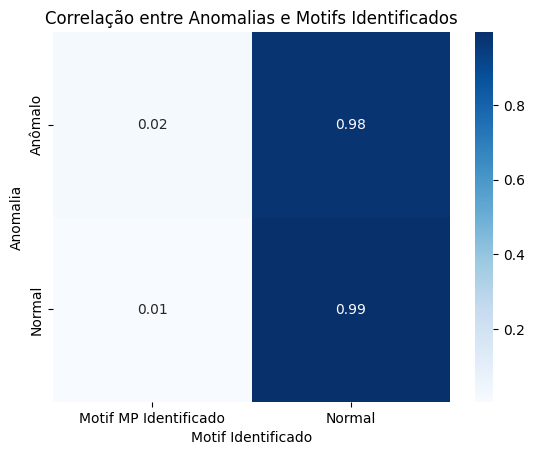

In [57]:
# Plotar a correlação entre anomalias e motifs
sns.heatmap(motifs_anomalias_corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlação entre Anomalias e Motifs Identificados')
plt.xlabel('Motif Identificado')
plt.ylabel('Anomalia')
plt.show()

# 2.Validação Cruzada dos Motifs e Picos
* Objetivo: Comparar os motifs e Picos identificados pelo método find_peaks com aqueles identificados pelo Matrix Profile


In [58]:
# Datasets de motifs e picos
file_motifs_peaks = '/content/Dados_Picos.csv'
file_motifs_mp = '/content/Dados_Motifs_MP.csv'

dados_motifs_peaks = pd.read_csv(file_motifs_peaks)
dados_motifs_mp = pd.read_csv(file_motifs_mp)

In [59]:
# Adicionar a coluna 'Picos' aos dados para marcar os picos identificados pelos picos (find_peaks)
dados_motifs_peaks['Picos'] = ['Pico Identificado' if i in indices_picos else 'Normal' for i in range(len(dados_motifs_peaks))]


In [60]:
# Mesclar os dados dos dois métodos de relacionar de picos e motifs
dados_motifs_validados = dados_motifs_peaks.copy()
dados_motifs_validados['Motif_MP'] = dados_motifs_mp['Motif_MP']

In [61]:
# Comparar as duas colunas de picos e motifs para realizar uma validação cruzada
dados_motifs_validados['Motif_Consistente'] = np.where(
    (dados_motifs_validados['Picos'] == 'Motif Identificado') & (dados_motifs_validados['Motif_MP'] == 'Motif MP Identificado'),
    'Motif Validado',
    'Divergente'
)

In [62]:
# Mostrar os resultados da validação cruzada
print(dados_motifs_validados[['Picos', 'Motif_MP', 'Motif_Consistente']].head())


    Picos Motif_MP Motif_Consistente
0  Normal   Normal        Divergente
1  Normal   Normal        Divergente
2  Normal   Normal        Divergente
3  Normal   Normal        Divergente
4  Normal   Normal        Divergente


In [63]:
# Analisar a frequência dos motifs validados e divergentes
motif_validacao_frequencia = dados_motifs_validados['Motif_Consistente'].value_counts(normalize=True)
print(motif_validacao_frequencia)

Motif_Consistente
Divergente    1.0
Name: proportion, dtype: float64


In [64]:
# Alerta se todos os motifs são divergentes
if dados_motifs_validados['Motif_Consistente'].value_counts().get('Motif Validado', 0) == 0:
    print("Atenção: Todos os motifs e picos identificados são divergentes. Nenhum motif foi validado por um pico.")


Atenção: Todos os motifs e picos identificados são divergentes. Nenhum motif foi validado por um pico.


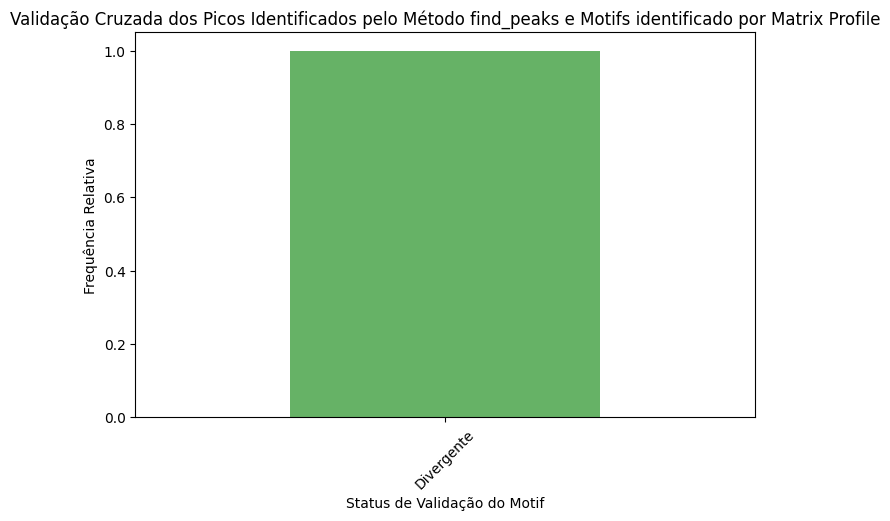

In [65]:
# Plotar a frequência dos motifs validados e divergentes
plt.figure(figsize=(8, 5))
motif_validacao_frequencia.plot(kind='bar', color=['green', 'red'], alpha=0.6)
plt.xlabel('Status de Validação do Motif')
plt.ylabel('Frequência Relativa')
plt.title('Validação Cruzada dos Picos Identificados pelo Método find_peaks e Motifs identificado por Matrix Profile')
plt.xticks(rotation=45)
plt.show()

# 3.Integração dos Motifs e das Anomalias com Similaridade Temporal (DTW)
* Objetivo: Integrar as informações de motifs, anomalias e similaridade temporal para identificar padrões consistentes e recorrentes


In [66]:
# Dataset de similaridade (DTW)
file_similarity = '/content/Dados_Similaridades.csv'
dados_similarity = pd.read_csv(file_similarity)


In [67]:
# Mesclar os dados de motifs, anomalias e similaridade
dados_integrados['Similaridade'] = dados_similarity['Similaridade']

In [68]:
# Mostrar as colunas disponíveis nos dados carregados
print(dados_integrados.columns)

Index(['Seq', 'IMFB', 'BX', 'BY', 'BZ', 'PlasmaSpeed', 'Kp', 'Dst', 'Hp60',
       'Sunspot', 'F10.7', 'Classificacao', 'Segmento', 'Anomalia', 'Motif_MP',
       'Similaridade'],
      dtype='object')


In [69]:
if 'Motif_Peaks' not in dados_integrados.columns:
    indices_picos = find_peaks(dados_integrados['Kp'])[0]
    dados_integrados['Motif_Peaks'] = ['Motif Identificado' if i in indices_picos else 'Normal' for i in range(len(dados_integrados))]


In [70]:
# Verificar se a coluna 'Motif_Consistente' está presente, caso contrário, calcular novamente
dados_integrados['Motif_Consistente'] = np.where(
    (dados_integrados['Motif_Peaks'] == 'Motif Identificado') & (dados_integrados['Motif_MP'] == 'Motif MP Identificado'),
    'Motif Validado',
    'Divergente'
)

In [71]:
# Mesclar os dados de motifs, anomalias e similaridade
dados_integrados['Similaridade'] = dados_similarity['Similaridade']

In [72]:
# Analisar a relação entre motifs validados, anomalias e subsequências similares
dados_integrados['Padrão_Consistente'] = np.where(
    (dados_integrados['Motif_Consistente'] == 'Motif Validado') & (dados_integrados['Anomalia'] == 'Anômalo') & (dados_integrados['Similaridade'] == 'Similaridade Identificada'),
    'Padrão Relevante',
    'Normal'
)

In [73]:
# mostrar os resultados integrados
print(dados_integrados[['Motif_Consistente', 'Anomalia', 'Similaridade', 'Padrão_Consistente']].head())


  Motif_Consistente Anomalia               Similaridade Padrão_Consistente
0        Divergente   Normal                     Normal             Normal
1        Divergente   Normal  Similaridade Identificada             Normal
2        Divergente   Normal  Similaridade Identificada             Normal
3        Divergente   Normal  Similaridade Identificada             Normal
4        Divergente   Normal  Similaridade Identificada             Normal


In [74]:
# Verificar a frequência dos padrões consistentes e relevantes
padrao_frequencia = dados_integrados['Padrão_Consistente'].value_counts(normalize=True)
print(padrao_frequencia)


Padrão_Consistente
Normal    1.0
Name: proportion, dtype: float64


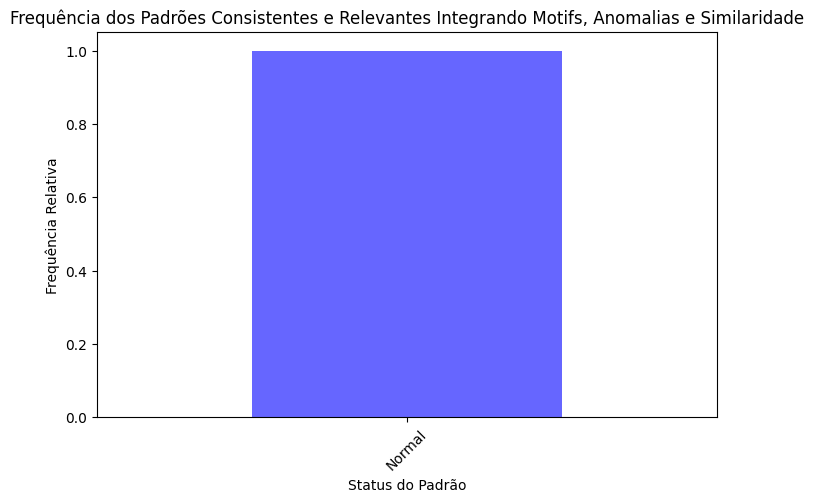

In [75]:
# Plotar a frequência dos padrões consistentes e relevantes
plt.figure(figsize=(8, 5))
padrao_frequencia.plot(kind='bar', color=['blue', 'orange'], alpha=0.6)
plt.xlabel('Status do Padrão')
plt.ylabel('Frequência Relativa')
plt.title('Frequência dos Padrões Consistentes e Relevantes Integrando Motifs, Anomalias e Similaridade')
plt.xticks(rotation=45)
plt.show()

# 4. Análise Temporal da Frequência e Padrões dos Motifs e Anomalias
* Objetivo: Realizar a análise  para identificar padrões consistentes
 * importante verificar se relaxando dos critérios apresenta um melhor resultado



In [76]:
# Variar essa execução
# Testar e relaxar os critérios para identificar padrões consistentes
# Considerar como 'Padrão Relevante' aqueles que atendem a pelo menos um dos critérios: anomalia, motif validado, ou similaridade identificada
dados_integrados['Padrão_Consistente_Relaxado'] = np.where(
    (dados_integrados['Motif_Consistente'] == 'Motif Validado') |
    (dados_integrados['Anomalia'] == 'Anômalo') |
    (dados_integrados['Similaridade'] == 'Similaridade Identificada'),
    'Padrão Relevante',
    'Normal'
)

In [77]:
# Verificar a frequência dos padrões consistentes relaxados
padrao_relaxado_frequencia = dados_integrados['Padrão_Consistente_Relaxado'].value_counts(normalize=True)
print(padrao_relaxado_frequencia)

Padrão_Consistente_Relaxado
Normal              0.941886
Padrão Relevante    0.058114
Name: proportion, dtype: float64


In [78]:
# Mostrar a conclusão da análise com base nos dados
conclusao = ""
if padrao_relaxado_frequencia.get('Padrão Relevante', 0) > 0:
    percentual_relevante = padrao_relaxado_frequencia['Padrão Relevante'] * 100
    conclusao = f"Após relaxar os critérios, identificamos que {percentual_relevante:.2f}% dos dados foram classificados como 'Padrão Relevante'. Isso indica que existem padrões consistentes que podem ser importantes para prever eventos críticos no clima espacial. Recomenda-se investigar mais a fundo esses padrões para entender seu significado físico e potencial preditivo."
else:
    conclusao = "Mesmo após relaxar os critérios, nenhum 'Padrão Relevante' foi identificado. Isso sugere que os critérios podem ainda estar muito restritivos ou que os dados não contêm padrões suficientemente fortes para serem identificados desta forma. Recomenda-se revisar os parâmetros ou métodos utilizados."

print(conclusao)

Após relaxar os critérios, identificamos que 5.81% dos dados foram classificados como 'Padrão Relevante'. Isso indica que existem padrões consistentes que podem ser importantes para prever eventos críticos no clima espacial. Recomenda-se investigar mais a fundo esses padrões para entender seu significado físico e potencial preditivo.


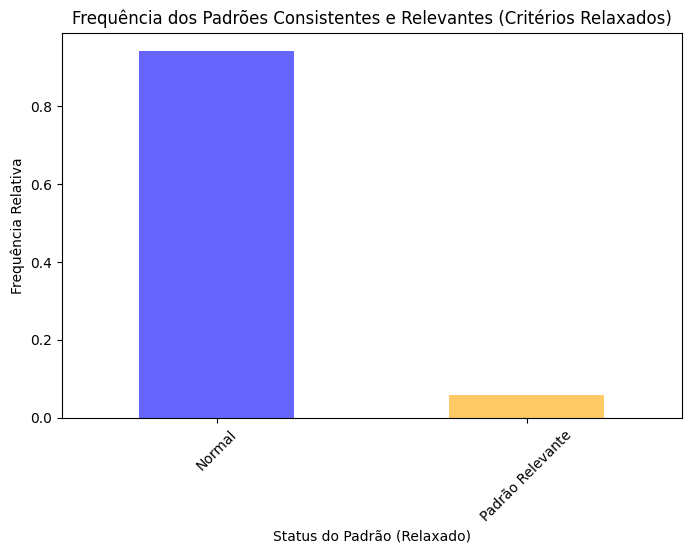

In [79]:
# Plotar a frequência dos padrões consistentes e relevantes após relaxar os critérios
plt.figure(figsize=(8, 5))
padrao_relaxado_frequencia.plot(kind='bar', color=['blue', 'orange'], alpha=0.6)
plt.xlabel('Status do Padrão (Relaxado)')
plt.ylabel('Frequência Relativa')
plt.title('Frequência dos Padrões Consistentes e Relevantes (Critérios Relaxados)')
plt.xticks(rotation=45)
plt.show()
